![banner](https://drive.google.com/uc?export=view&id=17IASiLdmYPmOvykj13acfJJDizUxviGd)
<u><h1>CMPUT 191 - Assignment 1</h1></u>
#### Due: January 28, 2021 @ 11:59 PM, via eClass submission page
By entering your name and CCID below, you hereby agree to following the Course Policies as outline on eClass [here](https://eclass.srv.ualberta.ca/mod/page/view.php?id=5859623) on late submissions, grading, and collaboration. 

For formatting simplicity, please do not add or remove any cells from this notebook. Write your Python code in a provided code cell, and run it if necessary so results are displayed inline in the notebook. Write your written responses in a provided Markdown cell. You may format your Markdown as you wish. 

<div class="alert alert-block alert-danger">
(1) Mahekkumar Kaneria <br>
(2) kaneria
</div>

### Task
A critical aspect to data analysis that is often overlooked when first foraying into the field is the *collection* of the data to be analyzed in the first place! In your very first assignment for CMPUT 191, you still will have the chance to do some basic data analysis, but it all relies on your ability to effectively collect some data first. And, we're leaving the *what* up to you!

Ever wonder if a certain circumstane is a simple coincidence, or if there's actually a hidden reason behind it? This questioning is what powers the scientific method: the creation of a question that we will then set out to constuct a hypothesis to answer, and then we prove ourselves right or wrong. Oftentimes in science, we set out to prove these seeming coincidences: from simple theories like if increasing temperatures is related to higher air conditioner sales, to more complex issues like if smoking is linked to an increased risk of cancer. 

A correlational study is often executed before developing a fully fledged experiment upon subjects, to see if there are signs of a relationship betweeen variables. The main objective of this assignment if for you to design and execute a simple correlational study.

### Part 1) Data Gathering

__Part 1.1)__
Pick two quantitative variables which you believe may or may not be related, and whose observations are tied together somehow (ie. taken place on the same date/time, co-exist in the same place, etc.). Provide an operational definition for each of the variables being measured, and then indicate which is the dependant and which is the independant variables, in the cell below. You must also indicate the source of your data.

Two variable I chose is **Monthly Edmonton covid cases** and **Unemployment Rate in Edmonton.**<br>
Here covid cases is independent variable and unemployment rate is dependent variable.

##### *source of covid data* https://data.edmonton.ca/Community-Services/COVID-19-in-Edmonton-Cumulative-Case-History/mina-ycn3 
##### *source of unemployment data* https://dashboard.edmonton.ca/Dashboard/Unemployment-Rate-Edmonton-CMA/sgij-r32u

__Part 1.2)__ A prediction shouldn't be utterly baseless. Use the text box below to explain why you chose the two variables you did -- perhaps you've noticed a coincidence here and there between them, or have heard of somewhere of the two actually being related. Ultimately, we don't want you to just randomly select things to measure. Furthermore, make a prediction here -- do you think the two variables will or will not have a correlation? 2 or 3 sentences should suffice. 

I chose this two variable as I heard in news and from many people that they lost their jobs due to lockdown in their country.
Also as company moved from office work to work from home they need less employees and less support staff so they need to fire many of their employees. Due to less sales and decreasing profit companies decide to cut their cost and most efficient option to cut the cost is to remove employees. So according to me I think that these two variable have a relation between them as if Covid cases increased, Unemployment rate must also increase and vice-versa.

__Part 1.3)__ Then, collect sample data either on the Internet or by real-world observations, and write into into a comma-separated value file (.csv). Upload it to JupyterHub, and read it into a table displaying the output in the cell below.

*Hint: Google how to create a .csv file if you're unsure -- a lot of programming practice boils down to learning how to do certain things by learning online! You may even find that tools like Excel or Google Sheets can export to a .csv format. If you're stuck, feel free to reach out to a TA for help.*

In [1]:
from datascience import *
import numpy as np

import numpy as np
#import math
#from datascience import *

#I have converted daily data from the orignal file to monthly data using Excel so that I can compare both the data
covid = Table.read_table('Covid cases edited.csv')
#This drops the unnecesary columns
covid = covid.drop("Confirmed Cases: Daily Change","Active Cases (As of Date)","Recovered Cases (Cumulative)","Deaths (Cumulative)",
                               "In Hospital (As of Date)","In Hospital: Daily Change","In Intensive Care (As of Date)","In Intensive Care: Daily Change","Deaths: Daily Change","Test Count: Edmonton","Test Count: Alberta","Test Percentage","Test Positivity Rate","Hospitalization Rate","Rate of Cases: Edmonton")
#This removes the data to match the months of other data
covid = covid.where("Confirmed Cases (Cumulative)",are.between(0,99725))

unemployment = Table.read_table('Unemployment rate edited.csv')
unemployment = unemployment.drop("National Unemployment Rate","Report Period")
covid






Month,Year,Date,Confirmed Cases (Cumulative)
March,2020,2020-03,78
April,2020,2020-04,400
May,2020,2020-05,499
June,2020,2020-06,796
July,2020,2020-07,1387
August,2020,2020-08,2489
September,2020,2020-09,4336
October,2020,2020-10,7957
November,2020,2020-11,17133
December,2020,2020-12,37208


### Part 2) Data Visualization

__Part 2.1)__ Use Python tools to draw a scatterplot of your two variables measured below. Make sure to run the cell so that your graph is displayed inline in the notebook. 

*Hint: you will need to import in a Python package. If you save the table you created in Part 1.2) into a variable, then you will be able to use that variable to create the scatterplot.*

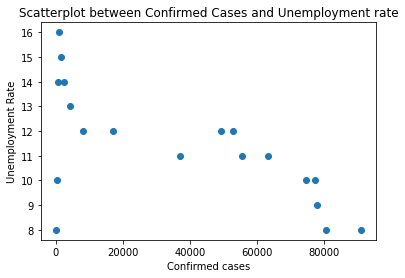

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
#plots.style.use('fivethirtyeight')

import numpy as np
import math
from datascience import *


x=covid.column("Confirmed Cases (Cumulative)")
y=unemployment.column("Unemployment Rate")
plots.scatter(x,y)
plots.xlabel('Confirmed cases')
plots.ylabel('Unemployment Rate')
plots.title("Scatterplot between Confirmed Cases and Unemployment rate")
plots.show()




### Part 3) Data Statistics
**Important: for all questions in this section, you must include Python code in the provided code cells in order to produce the required answers.**

__Part 3.1)__ Calculate and display the sample size of your data using Python:

In [3]:
covid_rows = covid.num_rows
unemployment_rows = unemployment.num_rows
print("Sample size of covid cases data is",covid_rows)
print("Sample size of Unemployment rate data is",unemployment_rows)

Sample size of covid cases data is 19
Sample size of Unemployment rate data is 19


__Part 3.2)__ Calculate and display the mean of both of your variables separately using Python:

In [4]:
covid_cases = covid.column("Confirmed Cases (Cumulative)")
unemployment_rate = unemployment.column("Unemployment Rate")
print("Mean of monthly covid cases in Edmonton is",np.mean(covid_cases))
print("Mean of unemployment rate in Edmonton is",round(np.mean(unemployment_rate),2))


Mean of monthly covid cases in Edmonton is 36579.0
Mean of unemployment rate in Edmonton is 11.37


__Part 3.3)__ Calculate and display the median of both of your variables separately using Python:

In [5]:
print("Median of monthly covid cases in Edmonton is",np.median(covid_cases))
print("Median of unemployment rate in Edmonton is",np.median(unemployment_rate))

Median of monthly covid cases in Edmonton is 37208.0
Median of unemployment rate in Edmonton is 11.0


__Part 3.4)__ Calculate and display the varianceof both of your variables separately using Python:

In [6]:
print("Variance of monthly covid cases in Edmonton is",round(np.var(covid_cases),2))
print("Variance of unemployment rate in Edmonton is",round(np.var(unemployment_rate),2))

Variance of monthly covid cases in Edmonton is 1110577431.58
Variance of unemployment rate in Edmonton is 5.18


__Part 3.5)__ Calculate and display the standard deviation of both of your variables separately using Python:

In [7]:
print("Standard deviation of monthly covid cases in Edmonton is",round(np.std(covid_cases),2))
print("Standard deviation of unemployment rate in Edmonton is",round(np.std(unemployment_rate),2))

Standard deviation of monthly covid cases in Edmonton is 33325.33
Standard deviation of unemployment rate in Edmonton is 2.28


__Part 3.6)__ Calculate and display the sum of squared deviations of both of your variables separately using Python:

In [8]:
sum_of_sq_covid= np.var(covid_cases)*(len(covid_cases)-1)
sum_of_sq_unemployment = np.var(unemployment_rate)*(len(unemployment_rate)-1)
print("Sum of squared deviations of covid cases in Edmonton is",round(sum_of_sq_covid,2))
print("Sum of squared deviations of unemployment rate in Edmonton is", round(sum_of_sq_unemployment,2))

Sum of squared deviations of covid cases in Edmonton is 19990393768.42
Sum of squared deviations of unemployment rate in Edmonton is 93.24


### Now, answer some questions related to your study. 

__Part 4.1)__ Think back to the beginning of this assignment; did your prediction from Part 1.2) hold true? Why or why not do you think so?

Yes, my prediction from Part 1.2 holds true as by looking at the scatter plot we can show that these two variable are related to each other and have correlation between them. Also my prediction that in the latter covid era unemployment will recover holds true as we can see in the plot that unemployment again went back to its orignal rate.

__Part 4.2)__ Is there any evident relationship or correlation between the variables? Refer back to your scatterplot.

Yes, in the first half of the Covid era, unemployment and covid cases are related as 
unemployment rate increased with increase in 
covid cases but in tha latter part as society evolved and learned how to work from home and how to tackle covid virus, unemployment rate again went down. So we can not firmly agree that they have correlation between them.

__Part 4.3)__ Describe the data you collected a bit. Do the data points cluster around a particular spot? Are there any discernible patterns? Can you think as to why? You can refer back to your scatterplot, if you'd like. 

Covid cases data is increasing throughout but the unemployment rate first increased rapidly and then gradually decreased and came back to its orignal place. According to me I think this happened as people learned how to tackle coronavirus and work from home efficiently and comapanies also found alternate solution of physical office work. One other reason can also be that work from home created new online business ideas and created many more job opportunities which further resulted to decreased unemployment rate. 

__Part 4.4)__ Are there any potential confounding variables that could be affecting the relationship between the variables? Explain.

According to me, there are no confounding variable that affect both of them. There are several variables which affect only one of the two variable like Online business

__Part 4.5)__ Can you conclude a causal relationship between the two variables? Why or why not?

Yes, we can definitely conclude that there is casual relationship between the two variable as in the initial phase one variable affects the other variable. Also by looking at the graph of just 2019 we can say that these two variable are in correlation with each other. 

<div class="alert alert-block alert-danger">
    Do not forget to submit your notebook and datasets on eClass by Jan 28, 5pm
    </div>